In [ ]:
# Instalar ipywidgets para generar una interfaz ui
!pip install ipywidgets

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input


In [ ]:

# Cargar el conjunto de datos Iris
data = [
  [5.1, 3.5, 1.4, 0.2, 0], [4.9, 3.0, 1.4, 0.2, 0], [4.7, 3.2, 1.3, 0.2, 0],
  [4.6, 3.1, 1.5, 0.2, 0], [5.0, 3.6, 1.4, 0.2, 0], [5.4, 3.9, 1.7, 0.4, 0],
  [4.6, 3.4, 1.4, 0.3, 0], [5.0, 3.4, 1.5, 0.2, 0], [4.4, 2.9, 1.4, 0.2, 0],
  [4.9, 3.1, 1.5, 0.1, 0], [5.4, 3.7, 1.5, 0.2, 0], [4.8, 3.4, 1.6, 0.2, 0],
  [4.8, 3.0, 1.4, 0.1, 0], [4.3, 3.0, 1.1, 0.1, 0], [5.8, 4.0, 1.2, 0.2, 0],
  [5.7, 4.4, 1.5, 0.4, 0], [5.4, 3.9, 1.3, 0.4, 0], [5.1, 3.5, 1.4, 0.3, 0],
  [5.7, 3.8, 1.7, 0.3, 0], [5.1, 3.8, 1.5, 0.3, 0], [5.4, 3.4, 1.7, 0.2, 0],
  [5.1, 3.7, 1.5, 0.4, 0], [4.6, 3.6, 1.0, 0.2, 0], [5.1, 3.3, 1.7, 0.5, 0],
  [4.8, 3.4, 1.9, 0.2, 0], [5.0, 3.0, 1.6, 0.2, 0], [5.0, 3.4, 1.6, 0.4, 0],
  [5.2, 3.5, 1.5, 0.2, 0], [5.2, 3.4, 1.4, 0.2, 0], [4.7, 3.2, 1.6, 0.2, 0],
  [4.8, 3.1, 1.6, 0.2, 0], [5.4, 3.4, 1.5, 0.4, 0], [5.2, 4.1, 1.5, 0.1, 0],
  [5.5, 4.2, 1.4, 0.2, 0], [4.9, 3.1, 1.5, 0.1, 0], [5.0, 3.2, 1.2, 0.2, 0],
  [5.5, 3.5, 1.3, 0.2, 0], [4.9, 3.1, 1.5, 0.1, 0], [4.4, 3.0, 1.3, 0.2, 0],
  [5.1, 3.4, 1.5, 0.2, 0], [5.0, 3.5, 1.3, 0.3, 0], [4.5, 2.3, 1.3, 0.3, 0],
  [4.4, 3.2, 1.3, 0.2, 0], [5.0, 3.5, 1.6, 0.6, 0], [5.1, 3.8, 1.9, 0.4, 0],
  [4.8, 3.0, 1.4, 0.3, 0], [5.1, 3.8, 1.6, 0.2, 0], [4.6, 3.2, 1.4, 0.2, 0],
  [5.3, 3.7, 1.5, 0.2, 0], [5.0, 3.3, 1.4, 0.2, 0], [7.0, 3.2, 4.7, 1.4, 1],
  [6.4, 3.2, 4.5, 1.5, 1], [6.9, 3.1, 4.9, 1.5, 1], [5.5, 2.3, 4.0, 1.3, 1],
  [6.5, 2.8, 4.6, 1.5, 1], [5.7, 2.8, 4.5, 1.3, 1], [6.3, 3.3, 4.7, 1.6, 1],
  [4.9, 2.4, 3.3, 1.0, 1], [6.6, 2.9, 4.6, 1.3, 1], [5.2, 2.7, 3.9, 1.4, 1],
  [5.0, 2.0, 3.5, 1.0, 1], [5.9, 3.0, 4.2, 1.5, 1], [6.0, 2.2, 4.0, 1.0, 1],
  [6.1, 2.9, 4.7, 1.4, 1], [5.6, 2.9, 3.6, 1.3, 1], [6.7, 3.1, 4.4, 1.4, 1],
  [5.6, 3.0, 4.5, 1.5, 1], [5.8, 2.7, 4.1, 1.0, 1], [6.2, 2.2, 4.5, 1.5, 1],
  [5.6, 2.5, 3.9, 1.1, 1], [5.9, 3.2, 4.8, 1.8, 1], [6.1, 2.8, 4.0, 1.3, 1],
  [6.3, 2.5, 4.9, 1.5, 1], [6.1, 2.8, 4.7, 1.2, 1], [6.4, 2.9, 4.3, 1.3, 1],
  [6.6, 3.0, 4.4, 1.4, 1], [6.8, 2.8, 4.8, 1.4, 1], [6.7, 3.0, 5.0, 1.7, 1],
  [6.0, 2.9, 4.5, 1.5, 1], [5.7, 2.6, 3.5, 1.0, 1], [5.5, 2.4, 3.8, 1.1, 1],
  [5.5, 2.4, 3.7, 1.0, 1], [5.8, 2.7, 3.9, 1.2, 1], [6.0, 2.7, 5.1, 1.6, 1],
  [5.4, 3.0, 4.5, 1.5, 1], [6.0, 3.4, 4.5, 1.6, 1], [6.7, 3.1, 4.7, 1.5, 1],
  [6.3, 2.3, 4.4, 1.3, 1], [5.6, 3.0, 4.1, 1.3, 1], [5.5, 2.5, 4.0, 1.3, 1],
  [5.5, 2.6, 4.4, 1.2, 1], [6.1, 3.0, 4.6, 1.4, 1], [5.8, 2.6, 4.0, 1.2, 1],
  [5.0, 2.3, 3.3, 1.0, 1], [5.6, 2.7, 4.2, 1.3, 1], [5.7, 3.0, 4.2, 1.2, 1],
  [5.7, 2.9, 4.2, 1.3, 1], [6.2, 2.9, 4.3, 1.3, 1], [5.1, 2.5, 3.0, 1.1, 1],
  [5.7, 2.8, 4.1, 1.3, 1], [6.3, 3.3, 6.0, 2.5, 2], [5.8, 2.7, 5.1, 1.9, 2],
  [7.1, 3.0, 5.9, 2.1, 2], [6.3, 2.9, 5.6, 1.8, 2], [6.5, 3.0, 5.8, 2.2, 2],
  [7.6, 3.0, 6.6, 2.1, 2], [4.9, 2.5, 4.5, 1.7, 2], [7.3, 2.9, 6.3, 1.8, 2],
  [6.7, 2.5, 5.8, 1.8, 2], [7.2, 3.6, 6.1, 2.5, 2], [6.5, 3.2, 5.1, 2.0, 2],
  [6.4, 2.7, 5.3, 1.9, 2], [6.8, 3.0, 5.5, 2.1, 2], [5.7, 2.5, 5.0, 2.0, 2],
  [5.8, 2.8, 5.1, 2.4, 2], [6.4, 3.2, 5.3, 2.3, 2], [6.5, 3.0, 5.5, 1.8, 2],
  [7.7, 3.8, 6.7, 2.2, 2], [7.7, 2.6, 6.9, 2.3, 2], [6.0, 2.2, 5.0, 1.5, 2],
  [6.9, 3.2, 5.7, 2.3, 2], [5.6, 2.8, 4.9, 2.0, 2], [7.7, 2.8, 6.7, 2.0, 2],
  [6.3, 2.7, 4.9, 1.8, 2], [6.7, 3.3, 5.7, 2.1, 2], [7.2, 3.2, 6.0, 1.8, 2],
  [6.2, 2.8, 4.8, 1.8, 2], [6.1, 3.0, 4.9, 1.8, 2], [6.4, 2.8, 5.6, 2.1, 2],
  [7.2, 3.0, 5.8, 1.6, 2], [7.4, 2.8, 6.1, 1.9, 2], [7.9, 3.8, 6.4, 2.0, 2],
  [6.4, 2.8, 5.6, 2.2, 2], [6.3, 2.8, 5.1, 1.5, 2], [6.1, 2.6, 5.6, 1.4, 2],
  [7.7, 3.0, 6.1, 2.3, 2], [6.3, 3.4, 5.6, 2.4, 2], [6.4, 3.1, 5.5, 1.8, 2],
  [6.0, 3.0, 4.8, 1.8, 2], [6.9, 3.1, 5.4, 2.1, 2], [6.7, 3.1, 5.6, 2.4, 2],
  [6.9, 3.1, 5.1, 2.3, 2], [5.8, 2.7, 5.1, 1.9, 2], [6.8, 3.2, 5.9, 2.3, 2],
  [6.7, 3.3, 5.7, 2.5, 2], [6.7, 3.0, 5.2, 2.3, 2], [6.3, 2.5, 5.0, 1.9, 2],
  [6.5, 3.0, 5.2, 2.0, 2], [6.2, 3.4, 5.4, 2.3, 2], [5.9, 3.0, 5.1, 1.8, 2]
]


In [ ]:
df = pd.DataFrame(data, columns=['petalo_longitud', 'petalo_ancho', 'sepalo_longitud', 'sepalo_ancho', 'especie'])

# Separando en características y etiquetas
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba, 80% entrenamiento 20%pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir etiquetas a formato de una sola columna para la clasificación multi-clase
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [ ]:

# Definir el modelo
model = Sequential([
    Input(shape=(4,)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')




Epoch 1/50
3/3 [==============================] - 1s 126ms/step - loss: 1.5739 - accuracy: 0.4062 - val_loss: 1.5424 - val_accuracy: 0.2917
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 1.6609 - accuracy: 0.2812 - val_loss: 1.3115 - val_accuracy: 0.2917
Epoch 3/50
3/3 [==============================] - 0s 26ms/step - loss: 1.7659 - accuracy: 0.3229 - val_loss: 1.1286 - val_accuracy: 0.2917
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 1.5115 - accuracy: 0.3958 - val_loss: 1.0252 - val_accuracy: 0.3333
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 1.3839 - accuracy: 0.4271 - val_loss: 0.9567 - val_accuracy: 0.3750
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 1.6393 - accuracy: 0.3750 - val_loss: 0.9149 - val_accuracy: 0.3750
Epoch 7/50
3/3 [==============================] - 0s 29ms/step - loss: 1.3818 - accuracy: 0.2812 - val_loss: 0.8881 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==========

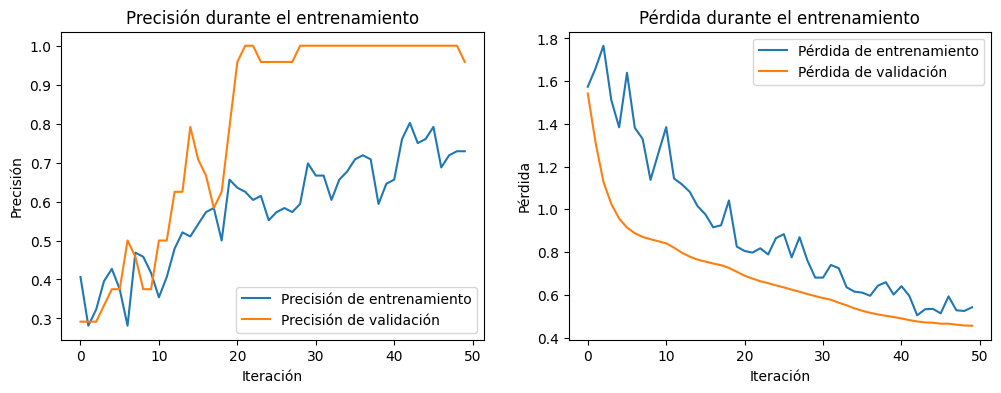

In [ ]:
# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


In [ ]:
# Guardar el modelo entrenado
model.save('/mnt/data/modelo_iris.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Exportando los datos de caidas y preciocion, para graficar en otra herramienta

In [ ]:
import json

# Exportar los datos a un archivo JSON
data = {
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss'],
    'accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy']
}

with open('model_metrics.json', 'w') as f:
    json.dump(data, f)

In [ ]:
# Cargar el modelo guardado
model = tf.keras.models.load_model('/mnt/data/modelo_iris.h5')

# Muestras de datos para predecir
nuevas_muestras = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Setosa
    [6.7, 3.1, 4.7, 1.5],  # Versicolor
    [7.2, 3.6, 6.1, 2.5]   # Virginica
])

predicciones = model.predict(nuevas_muestras)

clases_predichas = np.argmax(predicciones, axis=1)

especies = ['Setosa', 'Versicolor', 'Virginica']
especies_predichas = [especies[clase] for clase in clases_predichas]

for muestra, especie in zip(nuevas_muestras, especies_predichas):
    print(f'Mediciones: {muestra}, Prediccion especie: {especie}')


1/1 [==============================] - 0s 73ms/step
Mediciones: [5.1 3.5 1.4 0.2], Especie predicha: Setosa
Mediciones: [6.7 3.1 4.7 1.5], Especie predicha: Versicolor
Mediciones: [7.2 3.6 6.1 2.5], Especie predicha: Virginica


Interfaz de usuario rapida, para realizar pruebas

In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import tensorflow as tf

# Cargando el modelo entrenado
model = tf.keras.models.load_model('/mnt/data/modelo_iris.h5')

# Nombres de las etiquetas
nombres_etiquetas = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')

# Widget de formulario
longitud_petalo = widgets.FloatText(description='Longitud Pétalo', value=5.1)
ancho_petalo = widgets.FloatText(description='Ancho Pétalo', value=3.5)
longitud_sepalo = widgets.FloatText(description='Longitud Sépalo', value=1.4)
ancho_sepalo = widgets.FloatText(description='Ancho Sépalo', value=0.2)
button = widgets.Button(description='Predecir')

def on_button_clicked(b):

    valores = np.array([[longitud_petalo.value, ancho_petalo.value, longitud_sepalo.value, ancho_sepalo.value]])


    prediccion = model.predict(valores)
    prediccion_class = nombres_etiquetas[np.argmax(prediccion)]


    print(f'La flor es: {prediccion_class}')

button.on_click(on_button_clicked)

# Mostrar los widgets
display(longitud_petalo, ancho_petalo, longitud_sepalo, ancho_sepalo, button)


FloatText(value=5.1, description='Longitud Pétalo')

FloatText(value=3.5, description='Ancho Pétalo')

FloatText(value=1.4, description='Longitud Sépalo')

FloatText(value=0.2, description='Ancho Sépalo')

Button(description='Predecir', style=ButtonStyle())

1/1 [==============================] - 0s 74ms/step
La flor es: Iris-setosa
1/1 [==============================] - 0s 25ms/step
La flor es: Iris-setosa
1/1 [==============================] - 0s 41ms/step
La flor es: Iris-setosa


# Exportar el modelo a TensorFlow JS

In [ ]:
# Instalar TensorFlow.js y otras dependencias específicas
!pip install tensorflowjs
!pip install tensorflow==2.15.0
!pip install tensorflow-decision-forests==1.8.1

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1


In [ ]:
# Limpiar la sesión de Keras
import tensorflow as tf
import tensorflowjs as tfjs

tf.keras.backend.clear_session()

In [ ]:
# Cargar el modelo entrenado
model = tf.keras.models.load_model('/mnt/data/modelo_iris.h5')

In [ ]:
import os
output_dir = 'carpeta_salida1'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
# Convertir el modelo a TensorFlow.js
tfjs.converters.save_keras_model(model, output_dir)

In [ ]:
# Verificar los archivos en la carpeta de salida
print(os.listdir(output_dir))